1. Using the code example for plotting the PDF on page 127, plot the CDF and quantile functions.

In [3]:
using StatsPlots
using Distributions

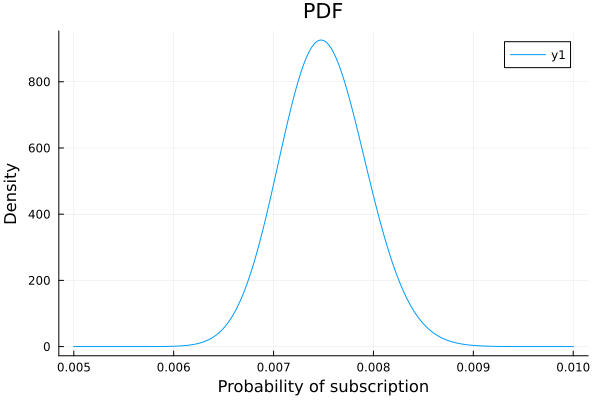

In [19]:
d = Beta(300, 40000-300)
x = 0.005:0.00001:0.01
y = pdf.(d,x)
plot(x,y, xlabel = "Probability of subscription", ylabel = "Density", title = "PDF")

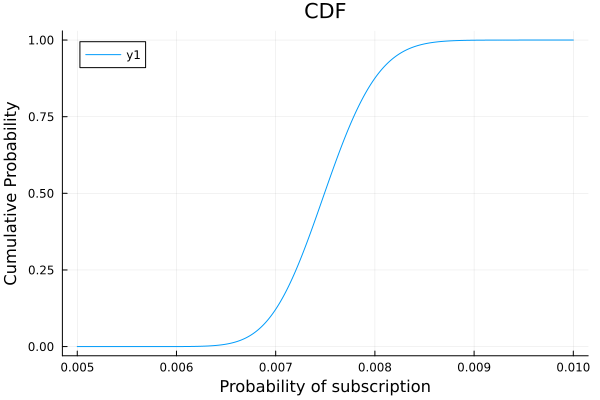

In [21]:
y = cdf.(d,x)
plot(x,y, xlabel = "Probability of subscription", ylabel = "Cumulative Probability", title = "CDF")

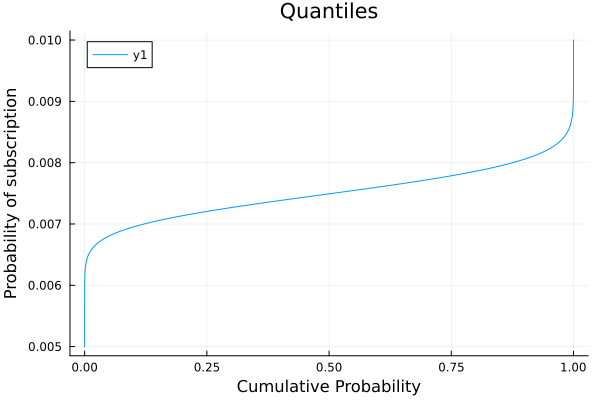

In [22]:
plot(y,x, xlabel = "Cumulative Probability", ylabel = "Probability of subscription", title = "Quantiles")

2. Returning to the task of measuring snowfall from Chapter 10, say you have the following measurements (in inches) of snowfall:

7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4

What is your 99.9 percent confidence interval for the true value of snowfall?

In [30]:
using HypothesisTests

function my_sigma(nums::Array)
    mu = mean(nums)
    sq_sum = 0
    for n in nums
        sq_sum += (n - mu) ^ 2
    end
    v = sq_sum / length(nums) 
    sigma = sqrt(v)
end

my_sigma (generic function with 1 method)

In [47]:
snow = [7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4]
mu = mean(snow)
sigma = my_sigma(snow)
d = Normal(mu, sigma)
l = quantile(d, (1-.999)/2)
u = quantile(d, 1-(1-.999)/2)
ci = (l,u)

(4.6476749958281545, 11.732325004171882)

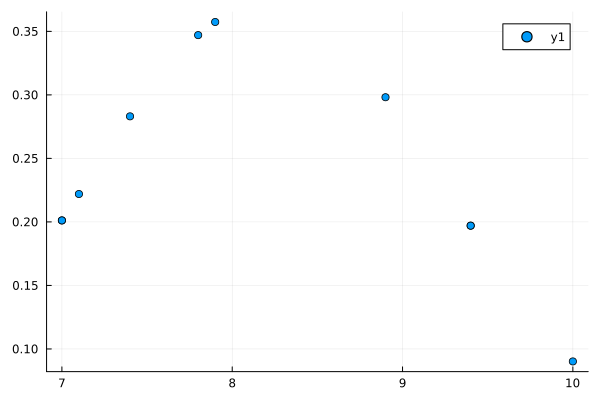

In [49]:
y_snow = pdf.(d, snow)
scatter(snow, y_snow)

3. A child is going door to door selling candy bars. So far she has visited 30 houses and sold 10 candy bars. She will visit 40 more houses today. What is the 95 percent confidence interval for how many candy bars she will sell the rest of the day?

In [45]:
d = Beta(10, 30-10)
l = quantile(d, 0.025)
u = quantile(d, 0.975)
ci = (l,u) .* 40

(7.175345969404473, 20.332934152399602)